## 1. NLP and EDA

## Content
- [Problem Statement](#Problem-Statement)
- [Exective Summary](#Executive-Summary)
- [Importing Libraries and Dataset](#Importing-Libraries-and-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Text Pre-processing and text EDA](#Text-Pre-processing-and-text-EDA)

## Problem Statement

An efficient hiring process saves a business time and money. Better hiring decisions mean less turnover. However to hire good and qualified candidates or to even attract good candidates for an interview, businesses need to ensure that they have a robust interview and hiring process.

I am a HR consultant and I was approached by a tech company to review their interview and hiring process. The client wants to give candidates the best interview experience regardless of whether they were accepted for the job. By doing so, they hope to achieve more positive interview reviews, strengthen the company branding and ultimately attract more talent.
 
The client have consolidated a list of interview feedback from interviewees. They have requested my team's help to analyse that feedback and find out how can they improve on their current interview process and give candidates the best interview experience.

## Executive Summary

To better improve their company branding and attract quality candidates for job openings, my client decides to improve their hiring process. To better understand how candidates feel about their interview, my client has surveyed their interview candidates and gotten anonymous feedback on the entire process. My client has requested my help to analyse the feedback and find out how they can improve on their current interview process and give candidates the best interview experience.

The goal of this project is to help the business identify a positive or negative interview experience as reviewed by the interviewee. By analysing companies with thousands of interview reviews on glassdoor, my team and I has built a model that can analyse the sentiments of a review and provide feedback to the company.

With this model, businesses will be able to tell if a reviewer has a positive or negative interview experience as an interviewee. Businesses can then use the insights to train their HR and hiring managers to adopt or avoid certain attributes during an interview as to give the interviewee the best interview experience.

We want to learn from both positive and negative interview experiences so as to adopt or avoid certain traits of an interview process. As we want to learn from both experiences and we have a rather imbalanced dataset, we optimize our model based on the accuracy score and ROC-AUC score.

We have trained several models and optimized our paramters based on accuracy score. Eventually, we decided to go with the logistic regression model. We chosen the logistic regression model due to the high accuracy and ROC-AUC score. It is also one of the model that doesnt exhibit overfitting.

On unseen data, our model has a 76.06% accuracy score, 88.95% sensitivity, 62.9% specificity and 81.43% roc-auc score. Our model is able to distinguish between positive and negative sentiments generally well.

From our model, we identified keywords that led to a positive or negative review. In summary, words like friendly, smooth, relaxed, patient, polite, casual, like conversation, prompt, efficient, professional are highly associated to positive sentiments. On the other hand, words like unprofessional, never heard, not friendly, late, condesending, ghosted, disorganized, impersonal, waste time, rushed, cancelled, awkward are highly associated to negative sentiments.

As for the limitations, our model is fitted with sentences that were scrapped from glassdoor only. As such, the model analysis is limited to the corpus of texts obtained. Any words that are new to the corpus will not be considered when doing vectorizing transformation and prediction. Another limitation is that our model is only able to pick up english words. If the review is in another language, our model is not able to accurately predict the sentiment.

Our client can use the model predictions and its findings to train their HR and hiring managers so that they can give interviewee a better interview experience regardless of a job offer at the end. This model is not just subjected to our client but also extended to businesses who have collected feedback from interviewees and want to understand the sentiments and gather insights.

## Importing Libraries and Dataset

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from matplotlib.pyplot import get_cmap
%matplotlib inline

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import regex as re
import requests
from bs4 import BeautifulSoup
from lxml import html
import getpass
from googletrans import Translator
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import unicodedata
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
amazon1 = pd.read_csv('../datasets/amazon.csv')
amazon2 = pd.read_csv('../datasets/amazon2.csv')
apple = pd.read_csv('../datasets/apple.csv')
facebook = pd.read_csv('../datasets/facebook.csv')
microsoft = pd.read_csv('../datasets/microsoft.csv')
google = pd.read_csv('../datasets/google.csv')

In [3]:
df = pd.concat([amazon1,amazon2,
                apple,facebook,microsoft,google])

In [4]:
df

,offer,experience,difficulty,interview,question,source
0,Accepted Offer,Positive Experience,Difficult Interview,NaN,NaN,Amazon
1,Accepted Offer,Positive Experience,Difficult Interview,NaN,NaN,Amazon
2,Accepted Offer,Positive Experience,Difficult Interview,There is one phone interview for an hour. If y...,Most questions are built around Amazon's 14 p...,Amazon
3,Accepted Offer,Positive Experience,Difficult Interview,Phone screen done by a recruiter then an on-si...,Tell me about a time when you had to make a q...,Amazon
4,Accepted Offer,Positive Experience,Difficult Interview,NaN,Tell me about yourself. Don't say something t...,Amazon
...,...,...,...,...,...,...
11665,No Offer,Positive Experience,Average Interview,J'ai passé deux entretiens chez eux puis un en...,Je ne me souviens pas de question très diffic...,Google
11666,Declined Offer,Negative Experience,Difficult Interview,NaN,NaN,Google
11667,Accepted Offer,Positive Experience,Difficult Interview,C'est un entretien d'embauche en beaucoup d'ét...,Combien de balles de ping pong peut on intégr...,Google
11668,Declined Offer,Positive Experience,Average Interview,"Es dauerte 2 Monate mit 2 Telefoninterviews, 4...",NaN,Google


In [5]:
df.describe()

,offer,experience,difficulty,interview,question,source
count,55870,54178,51467,36617,42939,55870
unique,3,6,3,36551,40165,5
top,No Offer,Positive Experience,Average Interview,On campus interview,NDA,Amazon
freq,34468,32196,25995,5,241,20000


In [6]:
df.isna().sum()

offer             0
experience     1692
difficulty     4403
interview     19253
question      12931
source            0
dtype: int64

In [7]:
df['experience'].value_counts()
# Supposed to only have positive, neutral and negative experience

Positive Experience    32196
Neutral Experience     11767
Negative Experience     9180
Average Interview        564
Difficult Interview      342
Easy Interview           129
Name: experience, dtype: int64

In [8]:
df = df[(df['experience']=='Positive Experience') | (df['experience']=='Neutral Experience') | (df['experience']=='Negative Experience')]

In [9]:
df.groupby(['experience']).describe()['interview']

,count,unique,top,freq
experience,,,,
Negative Experience,5240,5237,Setting up the interview was an effortless exp...,2
Neutral Experience,8144,8135,only made it through the first phone screening...,2
Positive Experience,22002,21970,There is one phone interview for an hour. If y...,3


In [10]:
df['interview'].fillna('', inplace = True)
df['question'].fillna('', inplace = True)
# fill all nan with ''

C:\Users\jiana\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
# df['interview'] = df['interview'] + ' ' + df['question']

In [12]:
df['length'] = df['interview'].apply(len)

<ipython-input-12-d736e9bafefe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['interview'].apply(len)


In [13]:
df.head()

,offer,experience,difficulty,interview,question,source,length
0,Accepted Offer,Positive Experience,Difficult Interview,,,Amazon,0
1,Accepted Offer,Positive Experience,Difficult Interview,,,Amazon,0
2,Accepted Offer,Positive Experience,Difficult Interview,There is one phone interview for an hour. If y...,Most questions are built around Amazon's 14 p...,Amazon,282
3,Accepted Offer,Positive Experience,Difficult Interview,Phone screen done by a recruiter then an on-si...,Tell me about a time when you had to make a q...,Amazon,309
4,Accepted Offer,Positive Experience,Difficult Interview,,Tell me about yourself. Don't say something t...,Amazon,0


## Exploratory Data Analysis

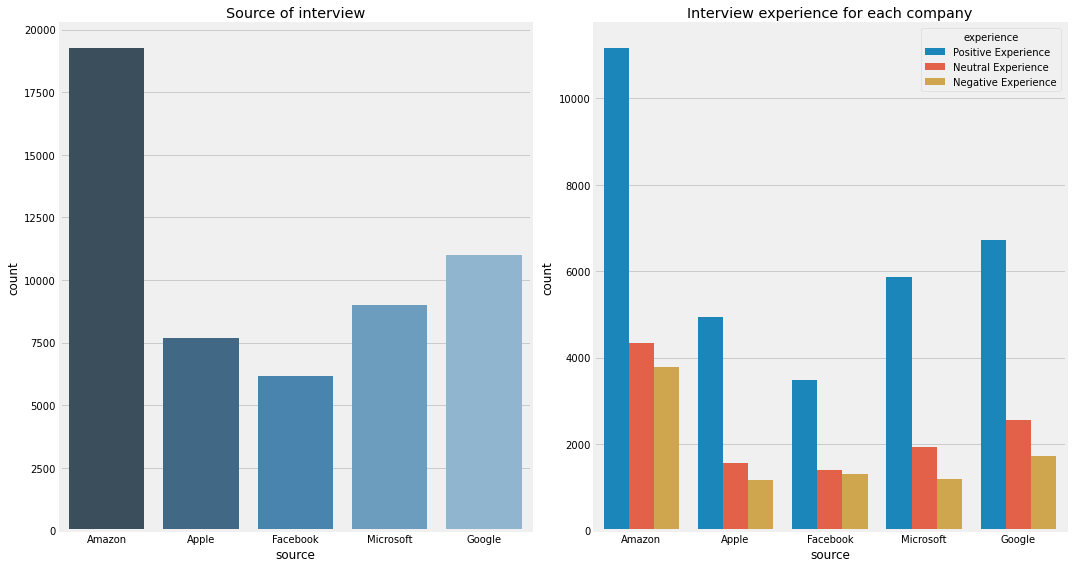

In [14]:
fig, ax = plt.subplots(1,2, figsize = [15,8])
sns.countplot(x = 'source', data = df, palette=("Blues_d"), ax = ax[0]);
ax[0].set_title('Source of interview');
sns.countplot(x = 'source', data = df, ax = ax[1], hue = 'experience');
ax[1].set_title('Interview experience for each company');
fig.tight_layout()

In [15]:
df['offer'].value_counts()

No Offer          32459
Accepted Offer    17071
Declined Offer     3613
Name: offer, dtype: int64

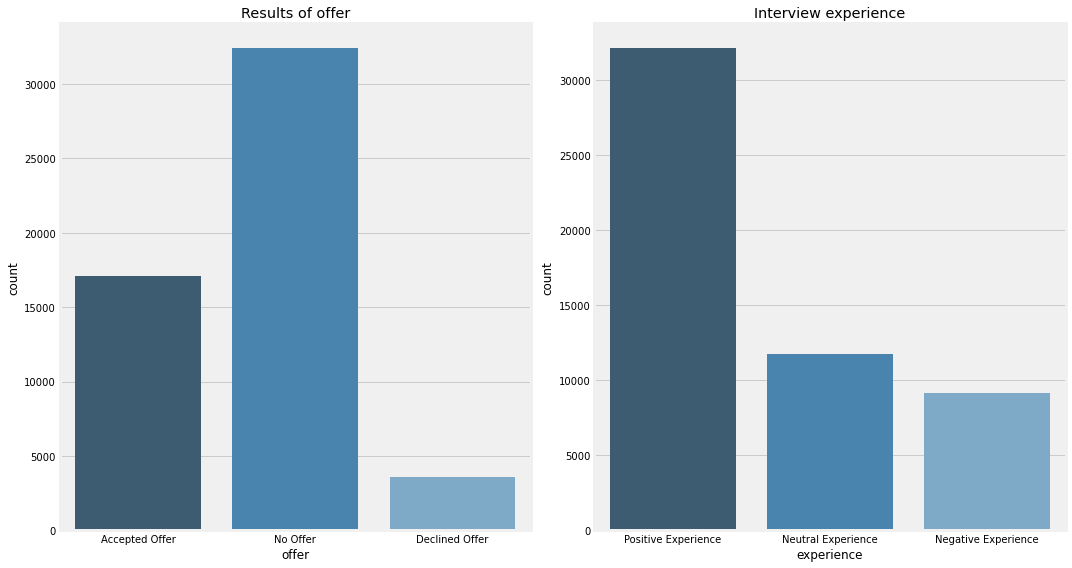

In [16]:
fig, ax = plt.subplots(1,2, figsize = [15,8])
sns.countplot(x = 'offer', data = df, palette=("Blues_d"), ax = ax[0]);
ax[0].set_title('Results of offer');
sns.countplot(x = 'experience', data = df, palette=("Blues_d"), ax = ax[1]);
ax[1].set_title('Interview experience');
fig.tight_layout()

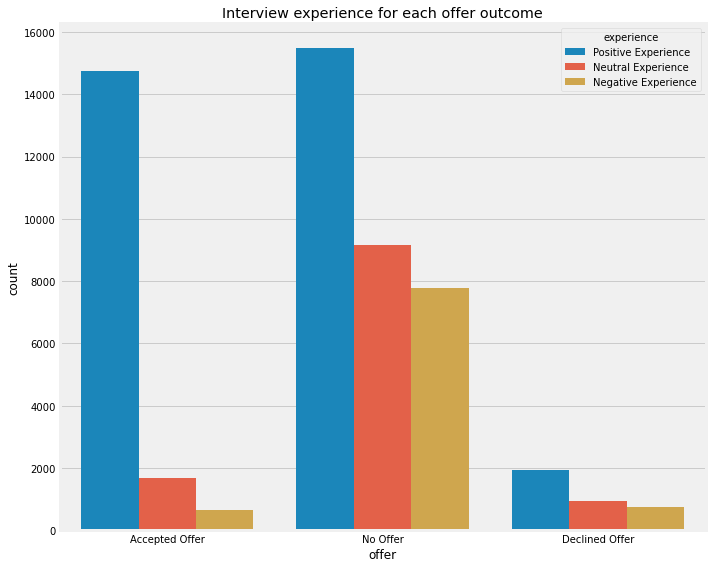

In [17]:
plt.figure(figsize = [10,8]);
sns.countplot(x = 'offer', data = df, hue = 'experience');
plt.title('Interview experience for each offer outcome');
plt.tight_layout()

In [18]:
df['difficulty'].value_counts()

Average Interview      25995
Difficult Interview    16010
Easy Interview          9462
Name: difficulty, dtype: int64

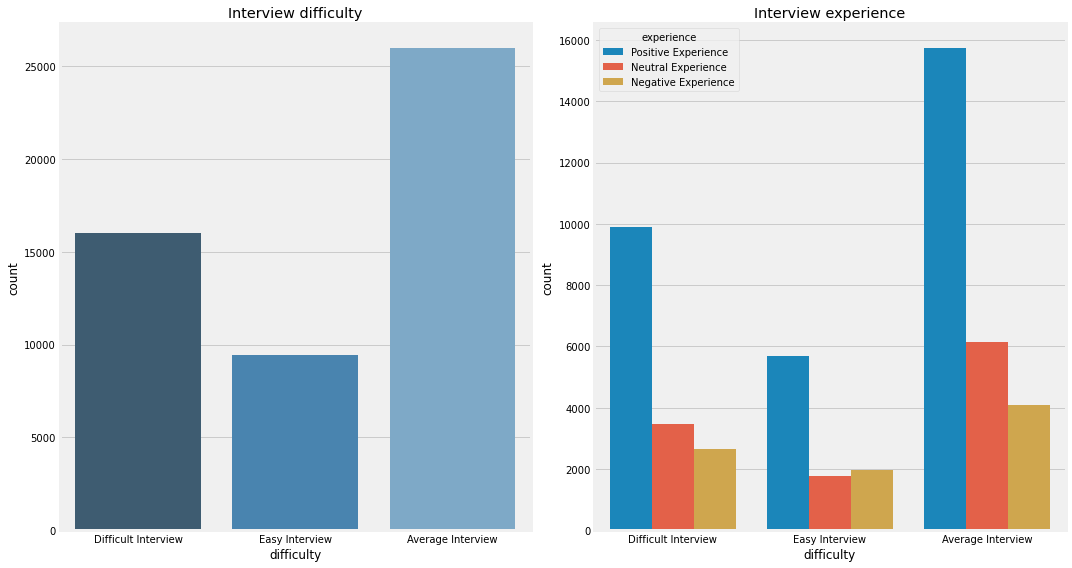

In [19]:
fig, ax = plt.subplots(1,2, figsize = [15,8])
sns.countplot(x = 'difficulty', data = df, palette=("Blues_d"), ax = ax[0]);
ax[0].set_title('Interview difficulty');
sns.countplot(x = 'difficulty', data = df, hue = 'experience', ax = ax[1]);
ax[1].set_title('Interview experience');
fig.tight_layout()

In [20]:
df['offer'] = df['offer'].map({'No Offer': 0, 'Declined Offer' : 1, 'Accepted Offer' : 2})

<ipython-input-20-f2d0043f31e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offer'] = df['offer'].map({'No Offer': 0, 'Declined Offer' : 1, 'Accepted Offer' : 2})


In [21]:
df['difficulty'] = df['difficulty'].map({'Average Interview' : 1, 'Easy Interview' : 2, 'Difficult Interview' : 0})

<ipython-input-21-4ce223f7e74d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difficulty'] = df['difficulty'].map({'Average Interview' : 1, 'Easy Interview' : 2, 'Difficult Interview' : 0})


In [22]:
df[df['experience'] == 'Neutral Experience']
# will drop these neutral experience out
# we want to find out what makes someone give a positive or negative interview experience rating

,offer,experience,difficulty,interview,question,source,length
9,1,Neutral Experience,1.0,"You apply online, then a recruiter reaches out...",,Amazon,1534
11,0,Neutral Experience,1.0,"I'm still in the interview process, however yo...",,Amazon,320
20,0,Neutral Experience,0.0,Make sure you come prepared with many examples...,Describe an instance where you worked with so...,Amazon,259
22,0,Neutral Experience,1.0,"This is was a while ago, but I think there wer...",Basic coding issues with For loops any syntax,Amazon,192
38,0,Neutral Experience,1.0,,,Amazon,0
...,...,...,...,...,...,...,...
11655,0,Neutral Experience,0.0,,,Google,0
11658,0,Neutral Experience,1.0,,,Google,0
11660,0,Neutral Experience,1.0,Die ersten zwei Telefongespräche (Skype) mit D...,,Google,277
11662,0,Neutral Experience,1.0,,,Google,0


In [23]:
df = df[df['experience'] != 'Neutral Experience']
# Dropping neutral experience as we want to find out what interview practices to adopt to get a 
# positive interview experience and avoid to prevent a negative interview experience

In [24]:
df['experience'] = df['experience'].apply(lambda exp : 1 if exp == 'Positive Experience' else 0)

In [25]:
df['experience']

0        1
1        1
2        1
3        1
4        1
        ..
11664    0
11665    1
11666    0
11667    1
11668    1
Name: experience, Length: 41376, dtype: int64

**Removing reivews with 0 words**

In [26]:
df = df[df['length']!=0]

In [27]:
print('Avg word count for positive experience : ',df[df.experience==1]['length'].mean())
print('Avg word count for negative experience : ',df[df.experience==0]['length'].mean())

Avg word count for positive experience :  325.20316334878646
Avg word count for negative experience :  457.9643129770992


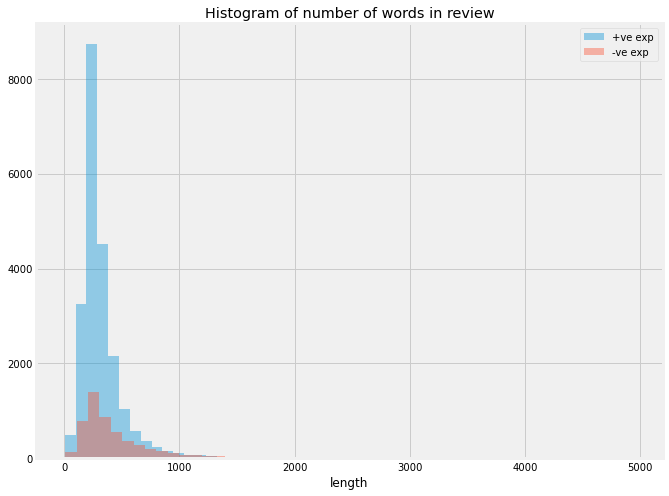

In [28]:
plt.figure(figsize = [10,8]);
sns.distplot(df[df.experience==1]['length'], label = '+ve exp', kde = False);
sns.distplot(df[df.experience==0]['length'], label = '-ve exp', kde = False);
plt.title('Histogram of number of words in review')
plt.legend();

**Reviews below 100 words and above 1000 words will be removed**

In [29]:
df = df[(df.length <= 1000) & (df.length >= 100)]

In [30]:
print('Avg word count for positive experience : ',df[df.experience==1]['length'].mean())
print('Avg word count for negative experience : ',df[df.experience==0]['length'].mean())

Avg word count for positive experience :  309.6902604487879
Avg word count for negative experience :  383.4922301553969


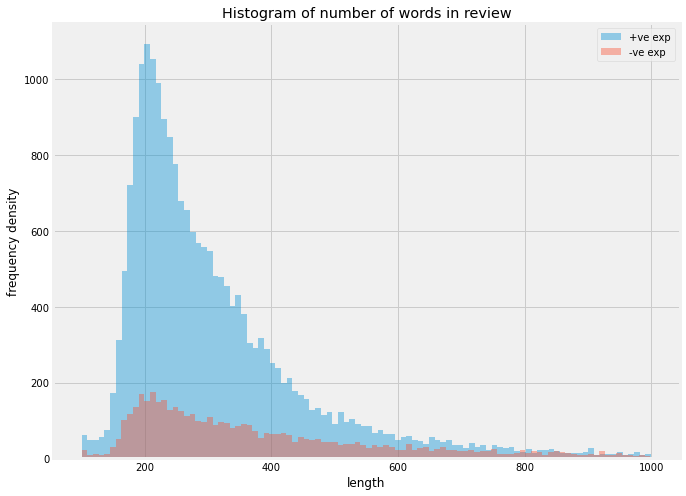

In [31]:
plt.figure(figsize = [10,8]);
sns.distplot(df[df.experience==1]['length'], label = '+ve exp', kde = False, bins = 100);
sns.distplot(df[df.experience==0]['length'], label = '-ve exp', kde = False, bins= 100);
plt.title('Histogram of number of words in review')
plt.ylabel('frequency density')
plt.legend();

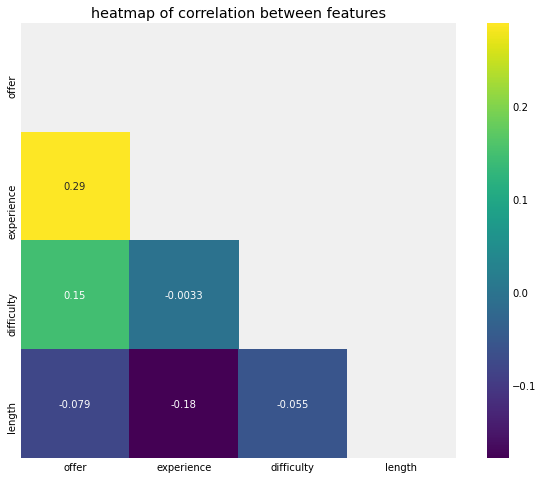

In [32]:
plt.figure(figsize = [10,8]);
plt.title('heatmap of correlation between features')
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', square = True, mask=mask);

## Text Pre-processing and text EDA

In [33]:
df['polarity'] = df['interview'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['subjectivity'] = df['interview'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

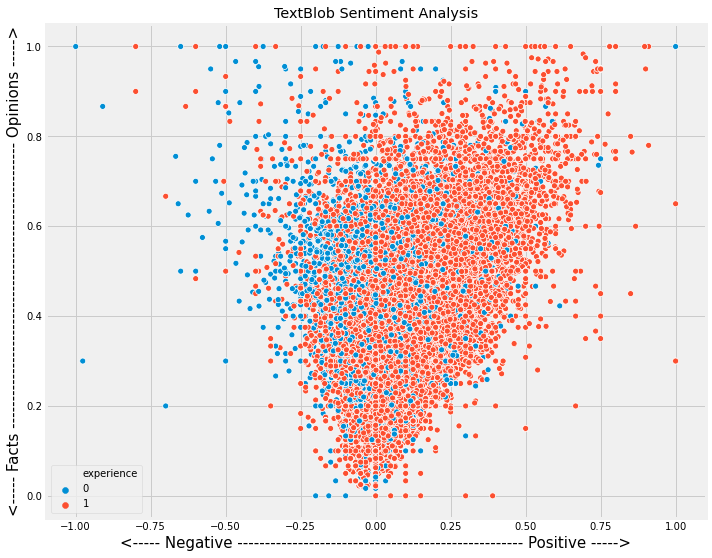

In [34]:
plt.figure(figsize = [10,8]);
g = sns.scatterplot(x = 'polarity', y = 'subjectivity', data = df, hue = 'experience');
plt.title('TextBlob Sentiment Analysis');
plt.xlabel('<----- Negative ---------------------------------------------------- Positive ----->', fontsize = 15);
plt.ylabel('<----- Facts ---------------------------------------------------- Opinions ----->', fontsize = 15);
plt.tight_layout()

- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement

In [35]:
df.rename(columns = {'experience' : 'target_variable'}, inplace = True)

**Adding more negative experience reviews to our minority Class**

In [36]:
bad1 = pd.read_csv('../datasets/badreviewsonly.csv')
bad2 = pd.read_csv('../datasets/badreviewsonly2.csv')

In [37]:
df = pd.concat([df,bad1,bad2])

In [38]:
df['target_variable'].value_counts()

1    21079
0    11800
Name: target_variable, dtype: int64

In [39]:
df

,offer,target_variable,difficulty,interview,question,source,length,polarity,subjectivity
2,2,1,0,There is one phone interview for an hour. If y...,Most questions are built around Amazon's 14 p...,Amazon,282,-0.050000,0.527778
3,2,1,0,Phone screen done by a recruiter then an on-si...,Tell me about a time when you had to make a q...,Amazon,309,0.000000,0.400000
5,2,1,2,The best interview process was insanely fast a...,None... direct hire after completing the know...,Amazon,270,0.369048,0.497619
8,2,1,1,Applied online and was sent a personality test...,Know the leadership principles,Amazon,334,0.056818,0.236364
12,2,1,1,"Once you pass the online virtual assessment, y...",How would you handle the issue of one of your...,Amazon,289,0.062500,0.440972
...,...,...,...,...,...,...,...,...,...
2639,No Offer,0,Average Interview,A new office was supposed to operate in Dubai ...,How would you promote influencers to create m...,bytedance,366,NaN,NaN
2640,Declined Offer,0,Average Interview,Applied the position online and very soon the ...,How do you think the real work for HRBP? why ...,bytedance,708,NaN,NaN
2641,No Offer,0,Average Interview,"Online tests first, then notified of telephone...",What single metric to use to measure how well...,bytedance,260,NaN,NaN
2642,Declined Offer,0,Easy Interview,I applied online and within 5 days they sent m...,"Please introuduce yourself, constantly: 'what...",bytedance,600,NaN,NaN


In [40]:
# def english_trans(word):
#     translator = Translator()
#     return translator.translate(word).text

In [41]:
# df['interview'] = df['interview'].apply(english_trans)

In [42]:
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [43]:
df['text'] = df['interview']

In [44]:
df[['text','target_variable']].to_csv('../datasets/dataset_raw.csv', index = False)

In [45]:
# processing text, without lemmatizing or stemming
p_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# stop_set = ['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
stop_words = set(stopwords.words('english'))
stop_words |= set(['interview','interviewer','question','recruiter','process','ask','amazon',
                   'apple','facebook','google','microsoft','walmart','accenture','dyson','wellsfargo','netflix','tesla','jpmorgan','bloomberg','linkedin','ebay','paypal','hubspot','docusign','nvidia','oracle','uber','twitter','lyft','pinterest','airbnb','yelp','booking.com','groupon',
                   'interviews','online','coding','manager','test','experience','applied','hiring','people','team','job','group','screen'])
              
stop_words.remove('not')

# Adding CSS class icon into list of words to remove
swear_words_corpus = requests.get("http://www.cs.cmu.edu/~biglou/resources/bad-words.txt").text # Swear words to be removed
swear_words = re.sub('[\n]', ' ', swear_words_corpus)
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


corpus = []
# def processing_text(texts): # Function to process texts
for i in range(0,len(df)):
    
    word = emoji_pattern.sub(r'', df['interview'][i]) # no emoji
    word = BeautifulSoup(word,'lxml').getText()
    word = re.sub('[^a-zA-Z]',' ',word.lower())    # Remove non-letters and convert all to lower case
    word = word.split() # Split into individual words
    
    clean = [w for w in word if w not in swear_words]
    clean = [w for w in word if w not in stop_words] # Removing stopwords and stemming remaining words
    clean = [w for w in clean if len(w) >= 2] # Remove all words that has single alphabets
    clean = ' '.join(clean)
    corpus.append(clean)

C:\Users\jiana\Anaconda3\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "Completed an online test. phone interview scheduled. the interviewer did not seem interested. Question about printing result of a cd command eg which directory it is in could contain ./.." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [46]:
df['text'] = corpus

In [47]:
cleaned_corpus = []

for i in corpus:
    word = i.split() # Split into individual words
#     clean = [p_stemmer.stem(w) for w in word] # Removing stopwords and stemming remaining words
    clean = [lemmatizer.lemmatize(w) for w in word] # Removing stopwords and lemmatizing remaining
    clean = [w for w in clean if w not in stop_words]
    clean = [w for w in clean if len(w) >= 2] # Remove all words that has single alphabets
    clean = ' '.join(clean)
    cleaned_corpus.append(clean)

In [48]:
df['text'] = cleaned_corpus

In [49]:
df['target_variable'].value_counts()

1    21079
0    11800
Name: target_variable, dtype: int64

In [50]:
df[['text','target_variable']].to_csv('../datasets/dataset.csv', index = False)

**EDA for interview reviews**

In [51]:
# Define a function for wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        width = 512,
        height = 512,
        stopwords = stop_words,
        max_words=100000,
#         max_font_size=200,
        min_font_size=5,
        scale=3,
        random_state=1
#         mask = mask
    ).generate(str(data))
    
    fig = plt.figure(figsize=(16, 16))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

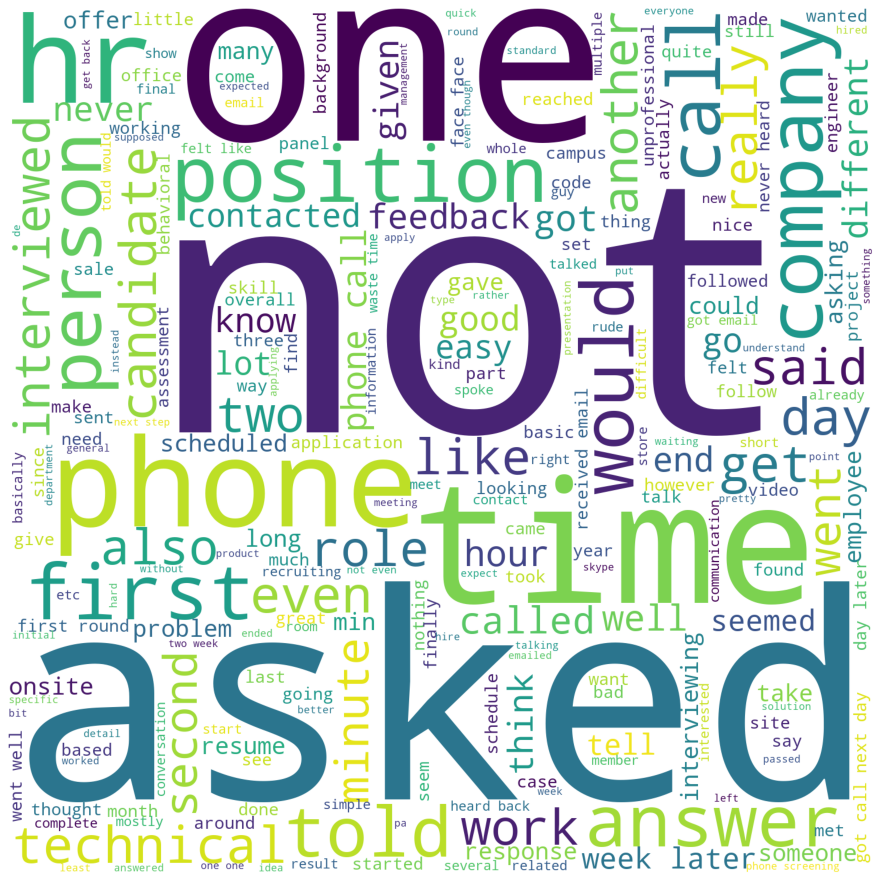

In [52]:
negative_rev = []
for index, row in df[df['target_variable']==0][['text']].iterrows():
    negative_rev.append(df.loc[index]['text'])

show_wordcloud(negative_rev)

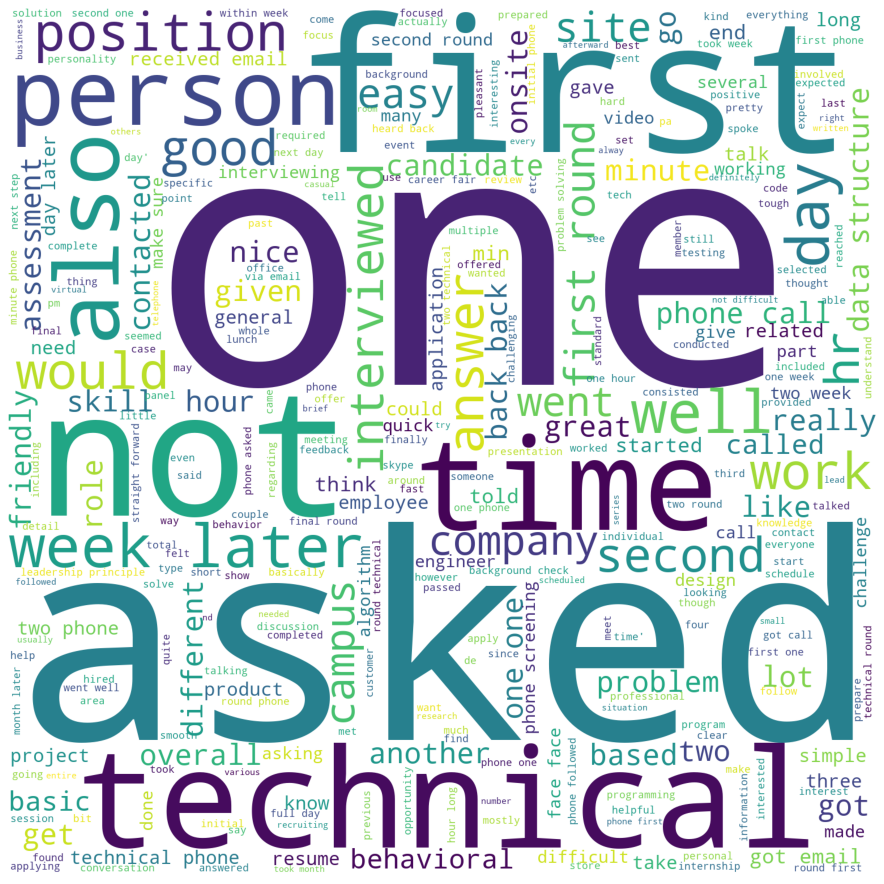

In [53]:
positive_rev = []
for index, row in df[df['target_variable']==1][['text']].iterrows():
    positive_rev.append(df.loc[index]['text'])

show_wordcloud(positive_rev)

In [54]:
# count vectorizer for EDA
cvec = CountVectorizer(stop_words='english', max_features = 10000, max_df = 0.95,
                       min_df = 3, ngram_range = (1, 2))
reviews = cvec.fit_transform(cleaned_corpus).toarray()

In [55]:
text = pd.DataFrame(reviews,columns = cvec.get_feature_names())
text

,aa,ability,ability think,ability work,able,able answer,able complete,able explain,able make,able pas,...,yr,ze,zero,zero feedback,zone,zoom,zu,zum,zurich,zwei
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data = pd.concat([text, df['target_variable']], axis = 1)

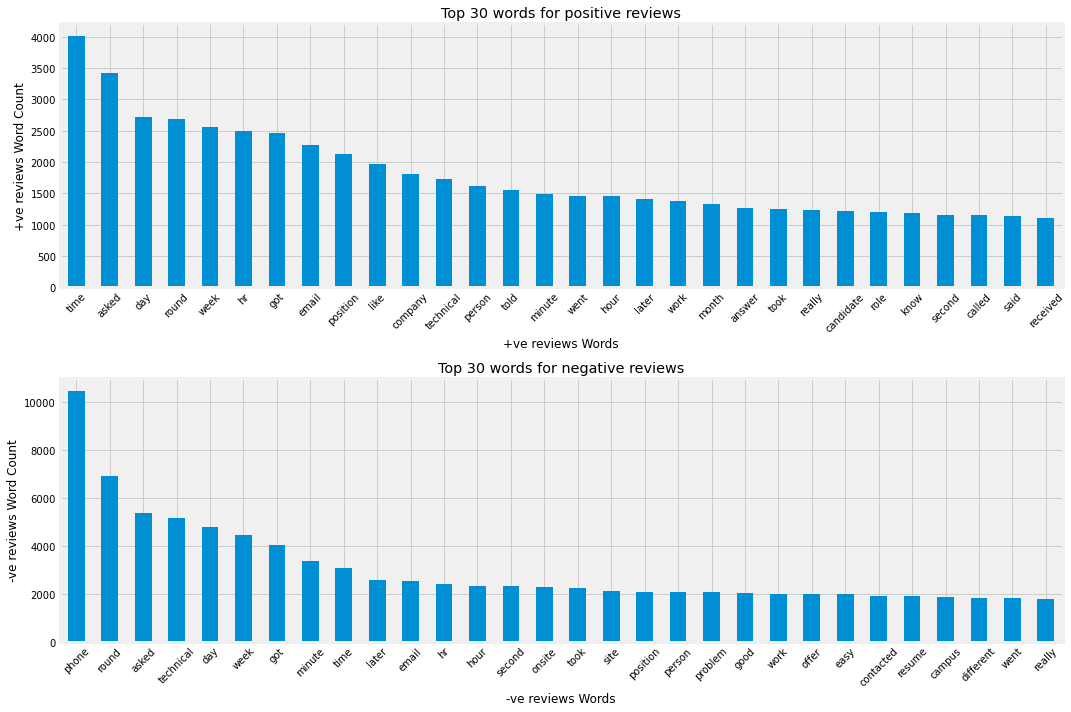

In [57]:
fig, ax = plt.subplots(2,1,figsize=[15,10]);

data[data['target_variable']==0].sum().sort_values(ascending = False)[1:31].plot(kind = 'bar', ax = ax[0], rot = 45);
data[data['target_variable']==1].sum().sort_values(ascending = False)[1:31].plot(kind = 'bar', ax = ax[1], rot = 45);

ax[0].set_title('Top 30 words for positive reviews');
ax[1].set_title('Top 30 words for negative reviews');

ax[0].set_ylabel('+ve reviews Word Count');
ax[0].set_xlabel('+ve reviews Words');
ax[1].set_ylabel('-ve reviews Word Count');
ax[1].set_xlabel('-ve reviews Words');

fig.tight_layout()

# Display of top 30 words from +ve and -ve review class

## EDA for word term frequency - inverse document frequency

In [58]:
tvec_neg = TfidfVectorizer(stop_words='english', max_features = 10000, max_df = 0.95,
                       min_df = 3, ngram_range = (1, 2))
tfidf_neg = tvec_neg.fit_transform(negative_rev).toarray()
tvec_pos = TfidfVectorizer(stop_words='english', max_features = 10000, max_df = 0.95,
                       min_df = 3, ngram_range = (1, 2))
tfidf_pos = tvec_pos.fit_transform(positive_rev).toarray()

In [59]:
tvec_neg_df_ = pd.DataFrame(tfidf_neg, columns = tvec_neg.get_feature_names())
tvec_pos_df_ = pd.DataFrame(tfidf_pos, columns = tvec_pos.get_feature_names())
tvec_neg_df = pd.DataFrame(tfidf_neg, columns = tvec_neg.get_feature_names()).T.sum(axis=1)
tvec_pos_df = pd.DataFrame(tfidf_pos, columns = tvec_pos.get_feature_names()).T.sum(axis=1)

In [60]:
# Define a function for wordcloud
def show_wordcloud_tvec(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        width = 512,
        height = 512,
        stopwords = stop_words,
        max_words=100000,
#         max_font_size=200,
        min_font_size=5,
        scale=3,
        random_state=1
#         mask = mask
    ).generate_from_frequencies(data)
    
    fig = plt.figure(figsize=(16, 16))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

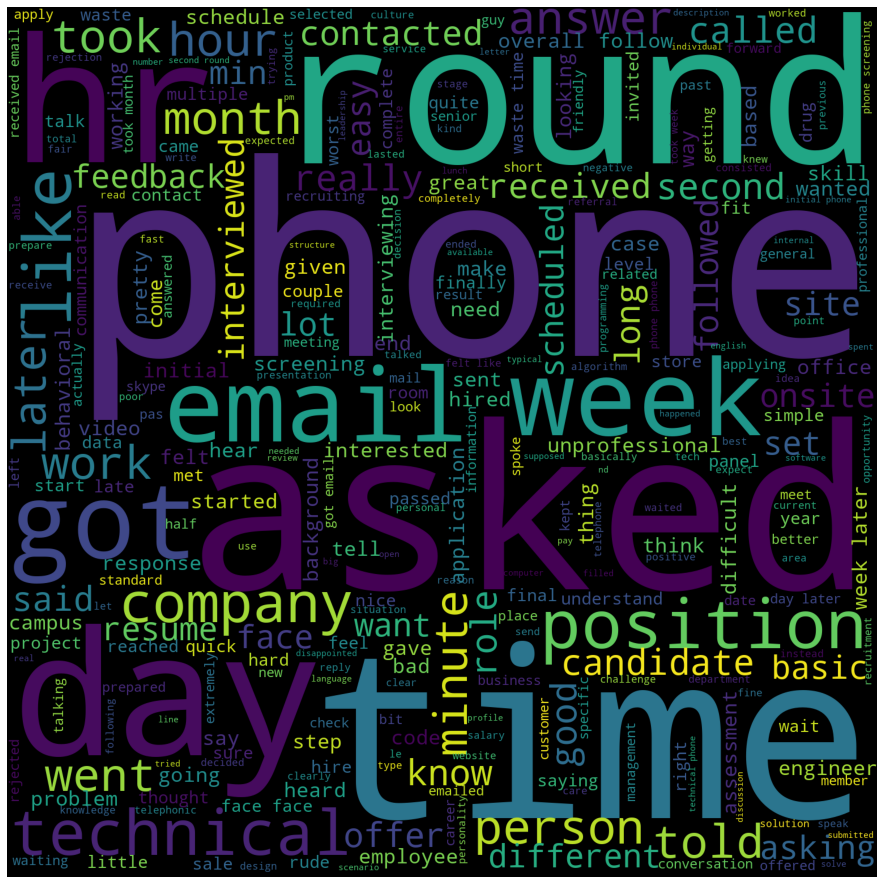

In [61]:
show_wordcloud_tvec(tvec_neg_df)

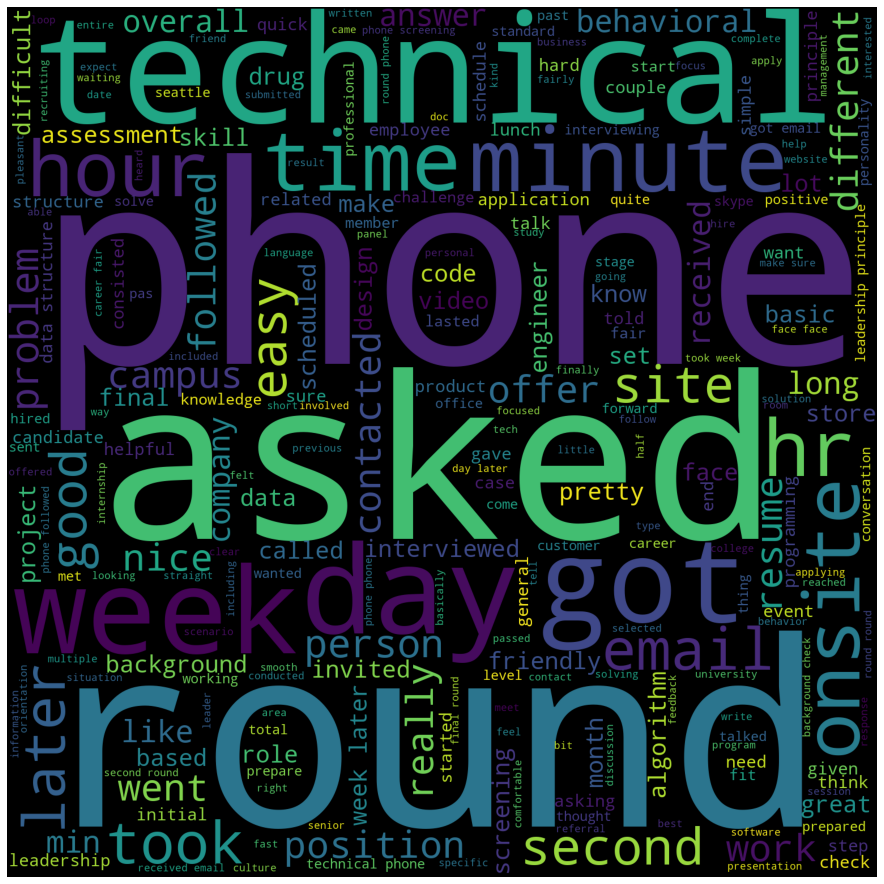

In [62]:
show_wordcloud_tvec(tvec_pos_df)

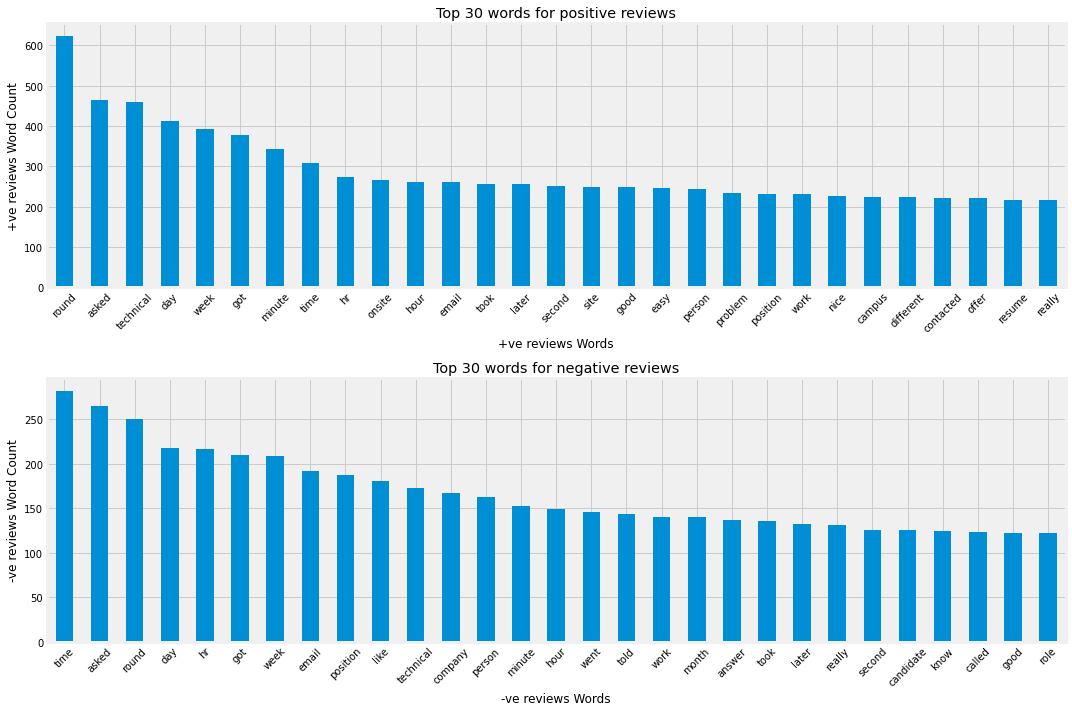

In [63]:
fig, ax = plt.subplots(2,1,figsize=[15,10]);

tvec_pos_df.sort_values(ascending = False)[1:30].plot(kind = 'bar', ax = ax[0], rot = 45);
tvec_neg_df.sort_values(ascending = False)[1:30].plot(kind = 'bar', ax = ax[1], rot = 45);

ax[0].set_title('Top 30 words for positive reviews');
ax[1].set_title('Top 30 words for negative reviews');

ax[0].set_ylabel('+ve reviews Word Count');
ax[0].set_xlabel('+ve reviews Words');
ax[1].set_ylabel('-ve reviews Word Count');
ax[1].set_xlabel('-ve reviews Words');

fig.tight_layout()

# Display of top 30 words from +ve and -ve review class

In [64]:
df.head()

,offer,target_variable,difficulty,interview,question,source,length,polarity,subjectivity,text
0,2,1,0,There is one phone interview for an hour. If y...,Most questions are built around Amazon's 14 p...,Amazon,282,-0.050000,0.527778,one phone hour clear invited onsite five onsit...
1,2,1,0,Phone screen done by a recruiter then an on-si...,Tell me about a time when you had to make a q...,Amazon,309,0.000000,0.400000,phone done site four leader site take situatio...
2,2,1,2,The best interview process was insanely fast a...,None... direct hire after completing the know...,Amazon,270,0.369048,0.497619,best insanely fast easy maybe pandemic crisis ...
3,2,1,1,Applied online and was sent a personality test...,Know the leadership principles,Amazon,334,0.056818,0.236364,sent personality simulator invited chime event...
4,2,1,1,"Once you pass the online virtual assessment, y...",How would you handle the issue of one of your...,Amazon,289,0.062500,0.440972,pas virtual assessment scheduled two virtual d...
